In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV

csv_df = pd.read_csv("mrv_database_done.csv", delimiter=';', encoding='utf-8-sig', decimal=',')

# Feature engineering
csv_df['hour'] = csv_df['time'].str.extract(r'(\d+):').astype(float)
csv_df['day_of_week'] = pd.to_datetime(csv_df['date'], dayfirst=True, errors='coerce').dt.dayofweek
csv_df['month'] = pd.to_datetime(csv_df['date'], dayfirst=True, errors='coerce').dt.month
csv_df['has_injure'] = csv_df['injured'].map({'да': 1, 'не': 0})
csv_df['has_died'] = csv_df['died'].map({'да': 1, 'не': 0})


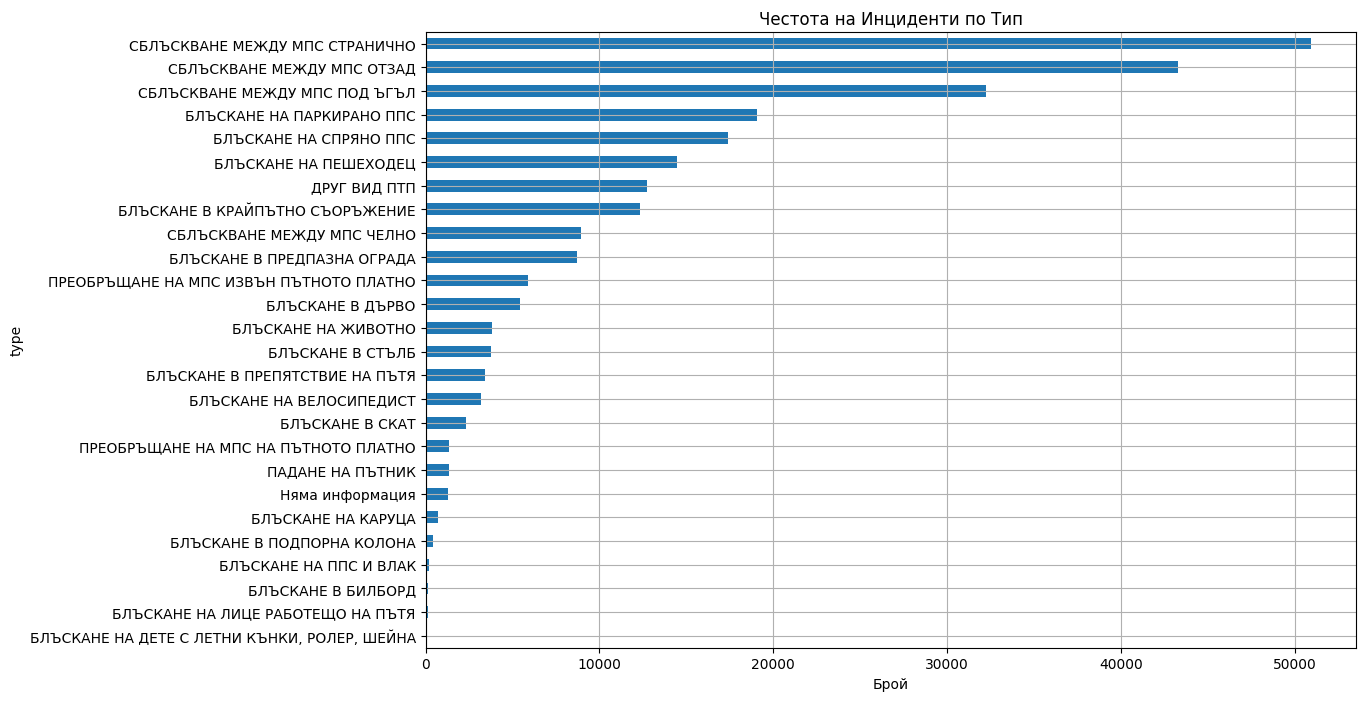

In [20]:

type_counts = csv_df['type'].value_counts()
type_counts.plot(kind='barh', figsize=(12, 8), title='Честота на Инциденти по Тип')
plt.xlabel("Брой")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


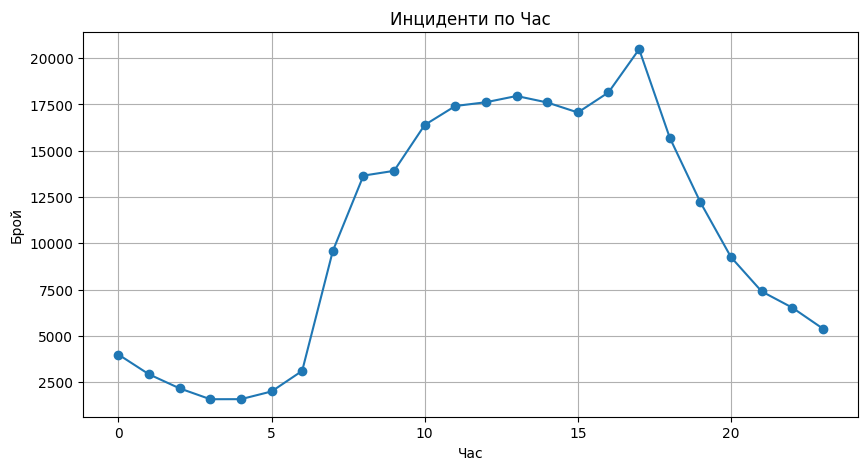

In [21]:

hour_counts = csv_df['hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(hour_counts.index, hour_counts.values, marker='o')
plt.title("Инциденти по Час")
plt.xlabel("Час")
plt.ylabel("Брой")
plt.grid(True)
plt.show()


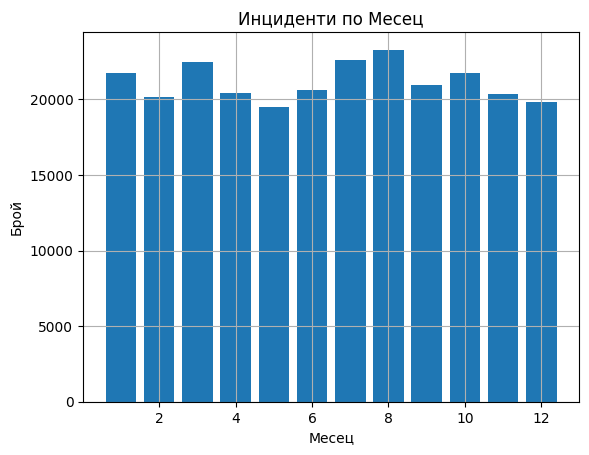

In [22]:

month_counts = csv_df['month'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values)
plt.title("Инциденти по Месец")
plt.xlabel("Месец")
plt.ylabel("Брой")
plt.grid(True)
plt.show()


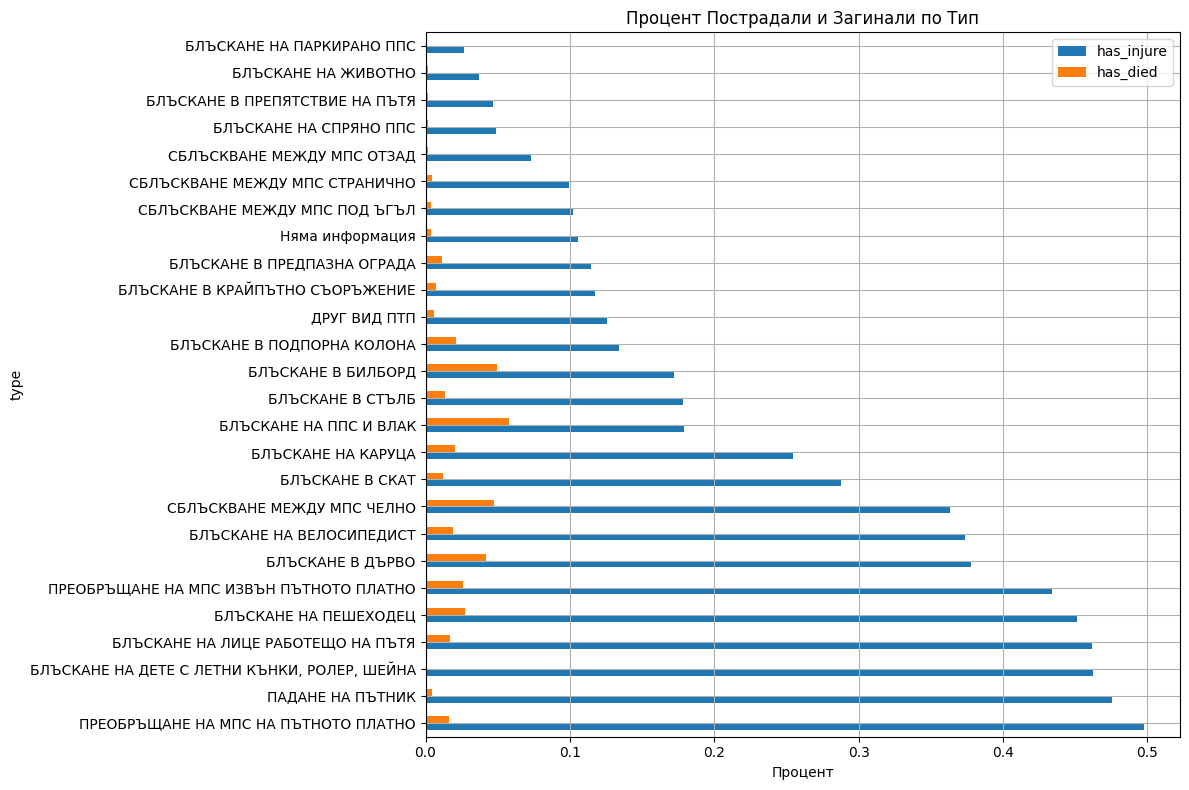

In [23]:

csv_df.groupby('type')[['has_injure', 'has_died']].mean().sort_values(by='has_injure', ascending=False).plot(kind='barh', figsize=(12, 8))
plt.title("Процент Пострадали и Загинали по Тип")
plt.xlabel("Процент")
plt.grid(True)
plt.tight_layout()
plt.show()


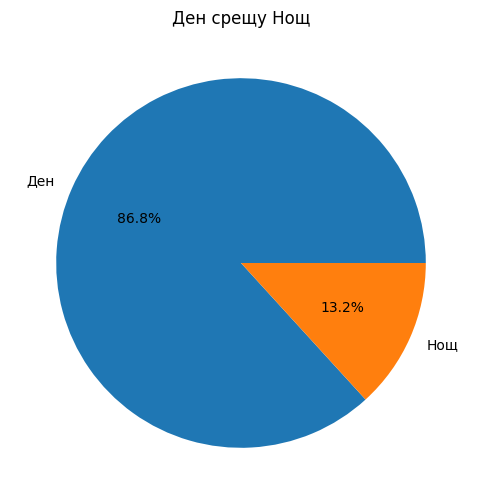

In [24]:

csv_df['time_of_day'] = csv_df['hour'].apply(lambda h: 'Нощ' if h < 6 or h >= 21 else 'Ден')
csv_df['time_of_day'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="Ден срещу Нощ")
plt.ylabel("")
plt.show()


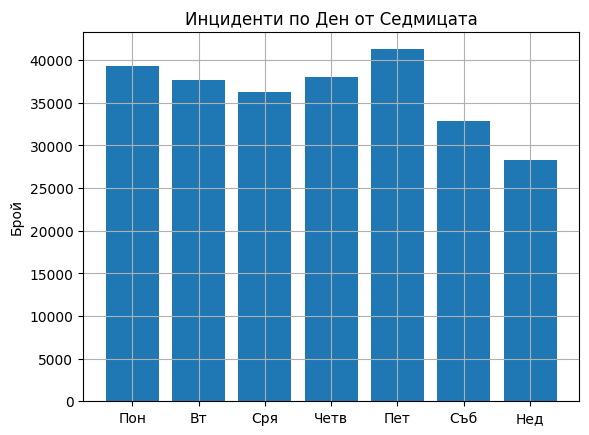

In [25]:

days = ['Пон', 'Вт', 'Сря', 'Четв', 'Пет', 'Съб', 'Нед']
dow_counts = csv_df['day_of_week'].value_counts().sort_index()
plt.bar(days, dow_counts)
plt.title("Инциденти по Ден от Седмицата")
plt.ylabel("Брой")
plt.grid(True)
plt.show()


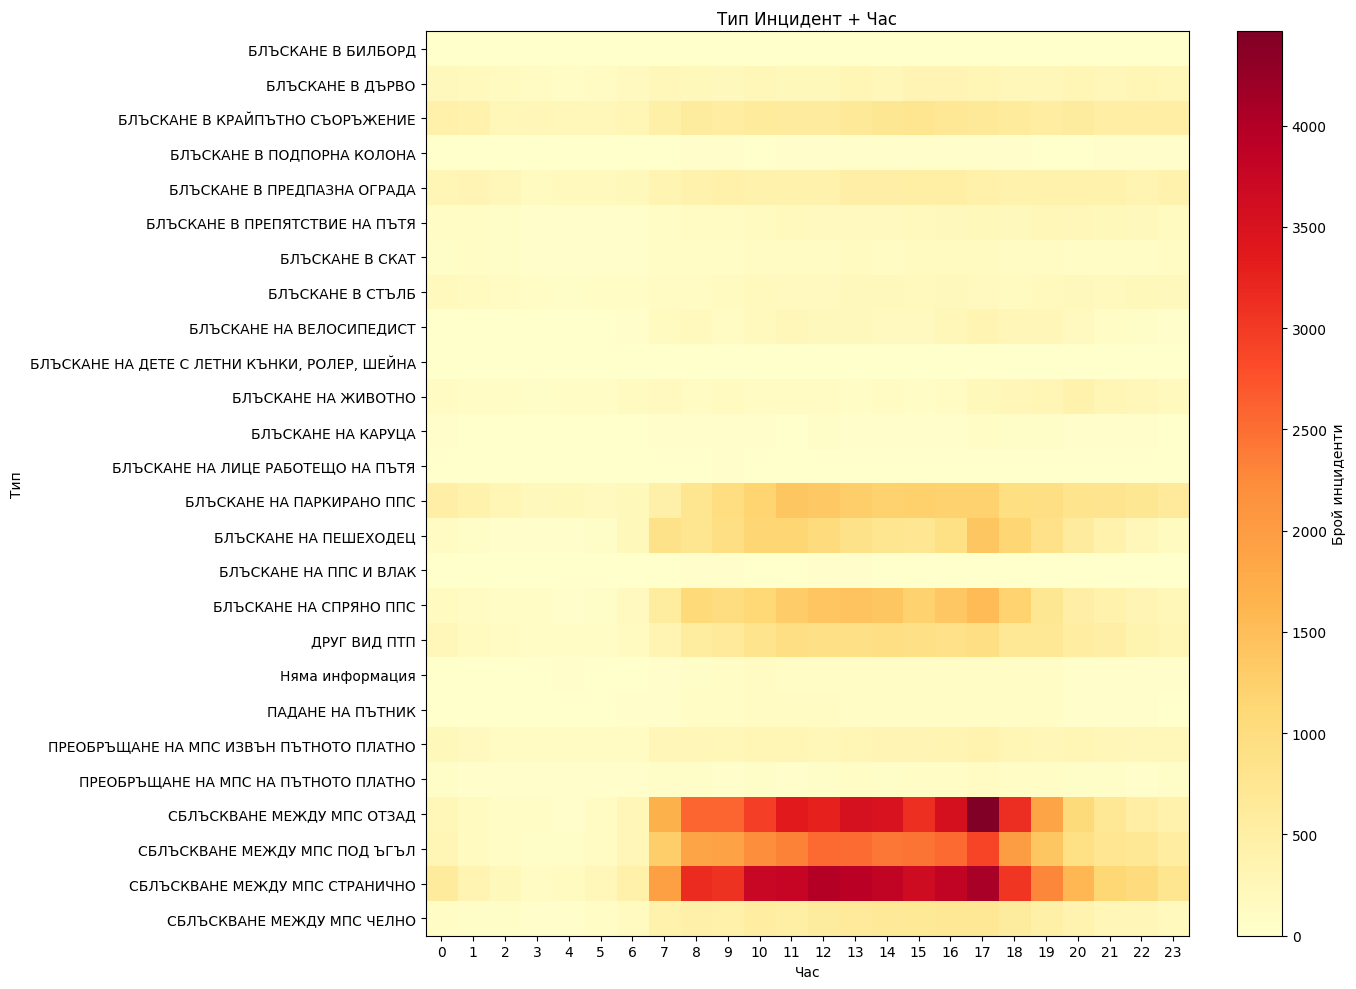

In [26]:

pivot = csv_df.pivot_table(index='type', columns='hour', values='year', aggfunc='count', fill_value=0)
plt.figure(figsize=(14, 10))
plt.imshow(pivot, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Брой инциденти')
plt.xticks(ticks=np.arange(0, 24), labels=np.arange(0, 24))
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.title("Тип Инцидент + Час")
plt.xlabel("Час")
plt.ylabel("Тип")
plt.tight_layout()
plt.show()


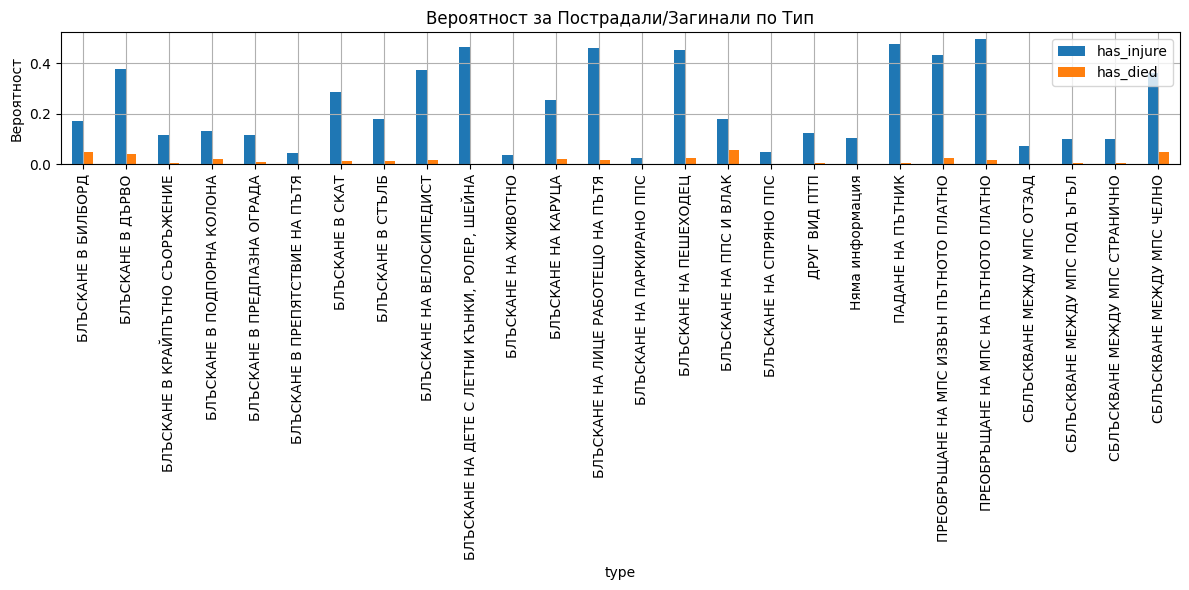

In [27]:

probs = csv_df.groupby('type')[['has_injure', 'has_died']].mean()
probs.plot(kind='bar', figsize=(12, 6), title="Вероятност за Пострадали/Загинали по Тип")
plt.ylabel("Вероятност")
plt.grid(True)
plt.tight_layout()
plt.show()


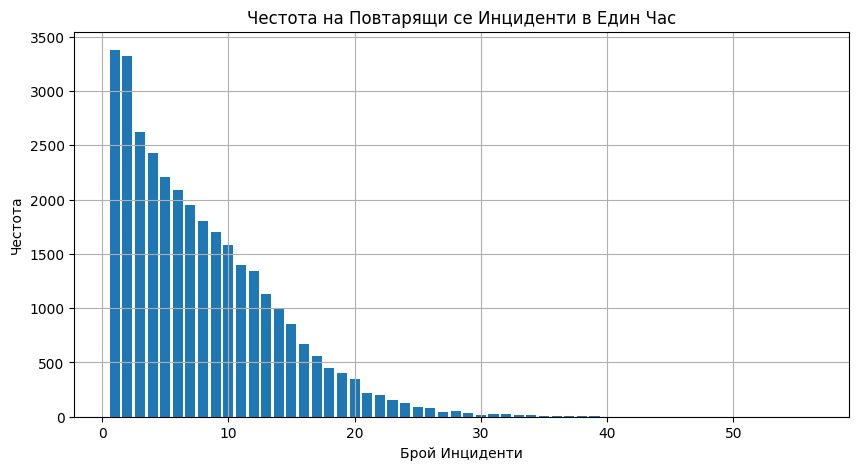

In [28]:

# Count same hour events
hourly_dups = csv_df.groupby(['date', 'hour']).size().value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(hourly_dups.index, hourly_dups.values)
plt.title("Честота на Повтарящи се Инциденти в Един Час")
plt.xlabel("Брой Инциденти")
plt.ylabel("Честота")
plt.grid(True)
plt.show()


📌 Заключение от Анализа на Данни за Пътнотранспортни Произшествия (Без Географски Данни)
След провеждането на серия от задълбочени анализи върху инциденти в България (без използване на координати), се очертаха следните ключови изводи и тенденции:

🧠 1. Най-чести Типове Инциденти
"Блъскане в крайпътно съоръжение" е най-разпространеният тип инцидент, което може да сигнализира за инфраструктурни слабости.

"Сблъскване между МПС странично" и "Блъскане на пешеходец" са също сред водещите категории – критични за пътната безопасност.

🕑 2. Времеви Анализи
Пикови часове: Инцидентите се концентрират в сутрешните и следобедните часове (8:00, 14:00, 17:00), което съвпада с периодите на висока трафикова активност.

По дни от седмицата: Понеделник и петък водят, вероятно поради начало/край на работната седмица.

По месеци: Повишена честота през летните месеци (юли и август), което предполага сезонен риск – повече движение по пътищата.

⚠️ 3. Опасни Типове Инциденти
"Блъскане на пешеходец" показва висока вероятност за наранявания, надвишаваща много други категории.

Някои по-редки инциденти също имат изключително висок дял на пострадали или загинали, което показва нуждата от приоритетно внимание, въпреки ниската честота.

🌙 4. Ден vs Нощ
Повечето инциденти се случват през деня (~75%), но нощните инциденти често са по-тежки поради намалена видимост и по-високи скорости.

🔄 5. Повтаряемост и Съвпадения по Час
В рамките на един и същ час на конкретни дати често се наблюдават множество инциденти, което показва:

Общи пикови натоварвания по пътищата.

Потенциал за натрупване на рискове, особено в натоварени участъци.

✅ Обобщено:
Съществуват ясни времеви и поведенчески закономерности в инцидентите.

Типът инцидент е силен индикатор за тежестта му (пострадали/загинали).

Сезонът, часът и денят влияят значимо на вероятността за инцидент.

Данните разкриват възможности за превантивни действия, особено по отношение на пешеходци, инфраструктура и натоварени периоди.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Prepare dataset: drop rows with missing coordinates or time
model_df = csv_df.dropna(subset=['x', 'y', 'time'])

# Feature engineering
model_df['hour'] = model_df['time'].str.extract(r'(\d+):').astype(float)
model_df['day'] = pd.to_datetime(model_df['date'], dayfirst=True, errors='coerce').dt.dayofweek
model_df['month'] = pd.to_datetime(model_df['date'], dayfirst=True, errors='coerce').dt.month
model_df['has_injure'] = model_df['injured'].map({'да': 1, 'не': 0})
model_df['has_died'] = model_df['died'].map({'да': 1, 'не': 0})
model_df['incident'] = model_df['has_injure'] | model_df['has_died']

# Simulate negative samples (locations with no incidents)
import numpy as np
neg_samples = model_df.sample(n=1000, random_state=42).copy()
neg_samples['incident'] = 0
neg_samples[['has_injure', 'has_died']] = 0

# Merge positive and synthetic negative examples
training_df = pd.concat([model_df[model_df['incident'] == 1], neg_samples])

# Select features and target
features = ['x', 'y', 'hour', 'day', 'month', 'type']
X = training_df[features]
y = training_df['incident']

# Preprocessing
cat_features = ['type']
num_features = ['x', 'y', 'hour', 'day', 'month']
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Train-test split and model pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
auc_score = roc_auc_score(y_test, y_prob)

report, auc_score


/tmp/ipython-input-29-1463793842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['hour'] = model_df['time'].str.extract(r'(\d+):').astype(float)
/tmp/ipython-input-29-1463793842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['day'] = pd.to_datetime(model_df['date'], dayfirst=True, errors='coerce').dt.dayofweek
/tmp/ipython-input-29-1463793842.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

({'0': {'precision': 0.05555555555555555,
   'recall': 0.01,
   'f1-score': 0.01694915254237288,
   'support': 300.0},
  '1': {'precision': 0.9627165453175998,
   'recall': 0.9933937823834197,
   'f1-score': 0.9778146117557057,
   'support': 7720.0},
  'accuracy': 0.9566084788029925,
  'macro avg': {'precision': 0.5091360504365776,
   'recall': 0.5016968911917098,
   'f1-score': 0.4973818821490393,
   'support': 8020.0},
  'weighted avg': {'precision': 0.9287828424586704,
   'recall': 0.9566084788029925,
   'f1-score': 0.941872013530768,
   'support': 8020.0}},
 np.float64(0.6882767702936097))

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Limit to top 5 most common types to avoid explosion in one-hot encoding
top_types = csv_df['type'].value_counts().nlargest(5).index
ml_df_small = csv_df[csv_df['type'].isin(top_types)].dropna(subset=['hour', 'day_of_week', 'month'])

# Add engineered fields
ml_df_small['has_injure'] = ml_df_small['injured'].map({'да': 1, 'не': 0})
ml_df_small['has_died'] = ml_df_small['died'].map({'да': 1, 'не': 0})
ml_df_small['incident'] = ml_df_small['has_injure'] | ml_df_small['has_died']

# Features and Target
X_small = ml_df_small[['hour', 'day_of_week', 'month', 'type']]
y_small = ml_df_small['incident']
X_small = pd.get_dummies(X_small, columns=['type'])

# Train-test split and model
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_small, y_small, test_size=0.3, random_state=42, stratify=y_small)
model_s = GradientBoostingClassifier(n_estimators=120, random_state=42)
model_s.fit(X_train_s, y_train_s)

# Predict and evaluate
y_pred_s = model_s.predict(X_test_s)
y_prob_s = model_s.predict_proba(X_test_s)[:, 1]
roc_auc_s = roc_auc_score(y_test_s, y_prob_s)
report_s = classification_report(y_test_s, y_pred_s, output_dict=True)
conf_matrix_s = confusion_matrix(y_test_s, y_pred_s)

roc_auc_s, report_s, conf_matrix_s


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(np.float64(0.6320742789860303),
 {'0': {'precision': 0.9178564123542646,
   'recall': 1.0,
   'f1-score': 0.9571690627532955,
   'support': 44874.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4016.0},
  'accuracy': 0.9178564123542646,
  'macro avg': {'precision': 0.4589282061771323,
   'recall': 0.5,
   'f1-score': 0.47858453137664775,
   'support': 48890.0},
  'weighted avg': {'precision': 0.8424603936998419,
   'recall': 0.9178564123542646,
   'f1-score': 0.8785437619552338,
   'support': 48890.0}},
 array([[44874,     0],
        [ 4016,     0]]))

In [33]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Logistic Regression with class weights
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train_s, y_train_s)
y_log_pred = log_model.predict(X_test_s)
y_log_prob = log_model.predict_proba(X_test_s)[:, 1]
roc_auc_log = roc_auc_score(y_test_s, y_log_prob)
report_log = classification_report(y_test_s, y_log_pred, output_dict=True)
conf_matrix_log = confusion_matrix(y_test_s, y_log_pred)

# XGBoost with scale_pos_weight
scale_weight = (len(y_train_s) - sum(y_train_s)) / sum(y_train_s)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_weight, random_state=42)
xgb_model.fit(X_train_s, y_train_s)
y_xgb_pred = xgb_model.predict(X_test_s)
y_xgb_prob = xgb_model.predict_proba(X_test_s)[:, 1]
roc_auc_xgb = roc_auc_score(y_test_s, y_xgb_prob)
report_xgb = classification_report(y_test_s, y_xgb_pred, output_dict=True)
conf_matrix_xgb = confusion_matrix(y_test_s, y_xgb_pred)

{
    "Logistic Regression ROC-AUC": roc_auc_log,
    "Logistic Regression Conf Matrix": conf_matrix_log,
    "XGBoost ROC-AUC": roc_auc_xgb,
    "XGBoost Conf Matrix": conf_matrix_xgb
}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Logistic Regression ROC-AUC': np.float64(0.6067301941452001),
 'Logistic Regression Conf Matrix': array([[19926, 24948],
        [ 1139,  2877]]),
 'XGBoost ROC-AUC': np.float64(0.6403072555124246),
 'XGBoost Conf Matrix': array([[27038, 17836],
        [ 1643,  2373]])}

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class_weight balanced
rf_model = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
rf_model.fit(X_train_s, y_train_s)

# Predictions and evaluation
y_rf_pred = rf_model.predict(X_test_s)
y_rf_prob = rf_model.predict_proba(X_test_s)[:, 1]
roc_auc_rf = roc_auc_score(y_test_s, y_rf_prob)
report_rf = classification_report(y_test_s, y_rf_pred, output_dict=True)
conf_matrix_rf = confusion_matrix(y_test_s, y_rf_pred)

roc_auc_rf, report_rf, conf_matrix_rf


(np.float64(0.6393347782600489),
 {'0': {'precision': 0.9391582932867336,
   'recall': 0.7185898292998173,
   'f1-score': 0.8142004065194611,
   'support': 44874.0},
  '1': {'precision': 0.1323943661971831,
   'recall': 0.47983067729083667,
   'f1-score': 0.20752786602767756,
   'support': 4016.0},
  'accuracy': 0.6989772959705461,
  'macro avg': {'precision': 0.5357763297419583,
   'recall': 0.599210253295327,
   'f1-score': 0.5108641362735693,
   'support': 48890.0},
  'weighted avg': {'precision': 0.8728878099324354,
   'recall': 0.6989772959705461,
   'f1-score': 0.7643661475173135,
   'support': 48890.0}},
 array([[32246, 12628],
        [ 2089,  1927]]))